In [ ]:
# Capture the state code argument passed from Python
args <- commandArgs(trailingOnly = TRUE)
state_code <- args[1]  # This could be something like "NY" or "ALL"

# Dynamically set the paths based on the state_code
allsubmissions_path <- paste0("../results/data/", state_code, "_SubmissionsEnrichedExpanded.csv")
uniquesubmissions_path <- paste0("../results/data/", state_code, "_UniqueComplaintsEnrichedExpanded.csv")

# Load datasets
allsubmissions <- read.csv(allsubmissions_path)
uniquesubmissions <- read.csv(uniquesubmissions_path)




# Now all the code references to "NY" in file paths or output file names
# should be replaced with `state_code`. For example:
#
# write.csv(results, paste0("../results/analysis/", state_code, "_generalreport.csv"), row.names = FALSE, quote = TRUE)
#
# Similarly, for graphs:
#
# ggsave(
#   filename = paste0("../results/analysis/", tolower(state_code), "_complaint_breakdown_1.png"),
#   width = 16, 
#   height = 6,
#   units = "in"
# )
#
# Continue updating all paths in the script to use `state_code` instead of hard-coded "NY".

# The rest of your R code stays the same, just ensure any hardcoded filenames
# or references are now dynamically generated using `state_code`.


In [1]:
# Install the packages
install.packages("ggplot2")
install.packages("dplyr")
install.packages("tidyr")
install.packages("readr")
library(ggplot2)
library(dplyr)
library(tidyr)
library(readr)


The downloaded binary packages are in
	/var/folders/x3/5gclj9rd6tj1rpgd5cwxqvy00000gn/T//RtmpggCmjz/downloaded_packages

The downloaded binary packages are in
	/var/folders/x3/5gclj9rd6tj1rpgd5cwxqvy00000gn/T//RtmpggCmjz/downloaded_packages

The downloaded binary packages are in
	/var/folders/x3/5gclj9rd6tj1rpgd5cwxqvy00000gn/T//RtmpggCmjz/downloaded_packages

The downloaded binary packages are in
	/var/folders/x3/5gclj9rd6tj1rpgd5cwxqvy00000gn/T//RtmpggCmjz/downloaded_packages



Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [3]:
# summarize the datasets

summary(uniquesubmissions)


 Remedy.Case.Number Organizational.level.of.submission Facility.of.Occurrence
 Min.   : 157212    Length:26119                       Length:26119          
 1st Qu.: 361478    Class :character                   Class :character      
 Median : 580568    Mode  :character                   Mode  :character      
 Mean   : 623208                                                             
 3rd Qu.: 875687                                                             
 Max.   :1200769                                                             
                                                                             
 Facility.Received  Receiving.Office   Case.Status        Status.Reason.1   
 Length:26119       Length:26119       Length:26119       Length:26119      
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                    

In [15]:
# BASIC ANALYSIS REPORT: 

# Count total number of submissions (total number of rows in the dataset)
all_submission_count <- allsubmissions %>%
  nrow()  # Count the number of rows

# Print the result
cat("Number of submissions:", all_submission_count, "\n")

# Count the total number of rows with Case.Status as "Rejected"
rejected_submission_count <- allsubmissions %>%
  filter(Case.Status == "Rejected") %>%  # Filter for rejected cases
  nrow()  # Count the number of rows

# Print the result
cat("Number of rejected submissions:", rejected_submission_count, "\n")

# Rejected complaints - have never been formally denied or granted
# 1. What percentage of unique complaints only have rejected submissions, i.e. the complaint was never properly addressed and therefore the inmate never received any resolution or explanation for why the issue could not be resolved.
# 2: What is the average number of rejected submissions for those unique complaints that only have rejected submissions


rejections_only <- uniquesubmissions %>%
  filter(Total.number.of.submissions.associated.with.this.CASENBR == Total.number.of.rejections.associated.with.this.CASENBR) %>%
  nrow()

cat('Number of unique complaints that only have rejected submissions:', rejections_only[[1]], "\n")

percentage_rejection_only <- (rejections_only / unique_submission_count) * 100
cat('Percentage of unique complaints that only have rejected submissions:', percentage_rejection_only[[1]], "\n")

# Filter to get only those submissions where the total submissions equals total rejections
rejections_only <- uniquesubmissions %>%
  filter(Total.number.of.submissions.associated.with.this.CASENBR == Total.number.of.rejections.associated.with.this.CASENBR)

# Calculate the average number of rejections for these filtered submissions
rej_only_average_rejections <- rejections_only %>%
  summarize(rej_only_average_rejections = mean(Total.number.of.rejections.associated.with.this.CASENBR, na.rm = TRUE))

cat('Average number of rejections per case number for complaints that only have rejected submissions:', average_rejections[[1]], "\n")

# Create a data frame for the results
results <- data.frame(
  Description = c(
    "Number of submissions",
    "Number of unique complaints",
    "Number of rejected submissions",
    "Average number of rejections per unique case number",
    "Max number of rejected submissions for one case number",
    "Number of unique complaints that only have rejected submissions",
    "Percentage of unique complaints that only have rejected submissions",
    "Average number of rejections per case number for complaints that only have rejected submissions"
    
  ),
  Value = c(
    all_submission_count,
    unique_submission_count,
    rejected_submission_count,
    average_rejections[[1]],
    max_rejections[[1]],
    rejections_only_count[[1]],
    percentage_rejection_only[[1]],
    rej_only_average_rejections[[1]]
  ),
  stringsAsFactors = FALSE
)

# Write the results to a CSV file
write.csv(results, "../results/analysis/NY_generalreport.csv", row.names = FALSE, quote = TRUE)


Number of submissions: 44979 
Number of rejected submissions: 20523 
Number of unique complaints that only have rejected submissions: 9325 
Percentage of unique complaints that only have rejected submissions: 35.70198 
Average number of rejections per case number for complaints that only have rejected submissions: 0.7857498 


In [16]:
# Calculate basic metrics
all_submission_count <- nrow(uniquesubmissions)
unique_submission_count <- nrow(uniquesubmissions %>% distinct(Remedy.Case.Number))
rejected_submission_count <- sum(uniquesubmissions$Total.number.of.rejections.associated.with.this.CASENBR, na.rm = TRUE)

# Calculate average and max rejections
average_rejections <- uniquesubmissions %>%
  summarize(avg_rejections = mean(Total.number.of.rejections.associated.with.this.CASENBR, na.rm = TRUE))

max_rejections <- uniquesubmissions %>%
  summarize(max_rejections = max(Total.number.of.rejections.associated.with.this.CASENBR, na.rm = TRUE))

# Filter submissions with only rejections
rejections_only <- uniquesubmissions %>%
  filter(Total.number.of.submissions.associated.with.this.CASENBR == Total.number.of.rejections.associated.with.this.CASENBR)

rejections_only_count <- nrow(rejections_only)

# Calculate the percentage of unique complaints that only have rejections
percentage_rejection_only <- (rejections_only_count / unique_submission_count) * 100

# Calculate the average number of rejections for complaints with only rejections
rej_only_average_rejections <- rejections_only %>%
  summarize(rej_only_avg = mean(Total.number.of.rejections.associated.with.this.CASENBR, na.rm = TRUE))

# Create a data frame for the results
results <- data.frame(
  Description = c(
    "Number of submissions",
    "Number of unique complaints",
    "Number of rejected submissions",
    "Average number of rejections per unique case number",
    "Max number of rejected submissions for one case number",
    "Number of unique complaints that only have rejected submissions",
    "Percentage of unique complaints that only have rejected submissions",
    "Average number of rejections per case number for complaints that only have rejected submissions"
  ),
  Value = c(
    all_submission_count,
    unique_submission_count,
    rejected_submission_count,
    average_rejections$avg_rejections,
    max_rejections$max_rejections,
    rejections_only_count,
    percentage_rejection_only,
    rej_only_average_rejections$rej_only_avg
  ),
  stringsAsFactors = FALSE
)

# Write the results to a CSV file
write.csv(results, "../results/analysis/NY_generalreport.csv", row.names = FALSE, quote = TRUE)

# Print the results
print(results)


                                                                                      Description
1                                                                           Number of submissions
2                                                                     Number of unique complaints
3                                                                  Number of rejected submissions
4                                             Average number of rejections per unique case number
5                                          Max number of rejected submissions for one case number
6                                 Number of unique complaints that only have rejected submissions
7                             Percentage of unique complaints that only have rejected submissions
8 Average number of rejections per case number for complaints that only have rejected submissions
         Value
1 2.611900e+04
2 2.611900e+04
3 2.052300e+04
4 7.857498e-01
5 1.900000e+01
6 9.325000e+03
7 3.570198e+0

In [18]:
# DATA: What is the breakdown of number of rejections for these unique complaints that only have rejected submissions?

rejectionbreakdown <- rejections_only %>%
  count(Total.number.of.rejections.associated.with.this.CASENBR, sort = TRUE)

print(rejectionbreakdown)

  Total.number.of.rejections.associated.with.this.CASENBR    n
1                                                       1 7304
2                                                       2 1309
3                                                       3  501
4                                                       4  131
5                                                       5   55
6                                                       6   15
7                                                       7    6
8                                                       8    3
9                                                      12    1


In [ ]:
# PRIMARY REMEDY CODE


# Read the data (replace 'path_to_your_csv' with the actual file path)
primaryreasonbreakdown <- uniquesubmissions

# Ensure relevant columns are numeric
primaryreasonbreakdown <- primaryreasonbreakdown %>%
  mutate(
    subcount = as.numeric(`Total.number.of.submissions.associated.with.this.CASENBR`),
    rejcount = as.numeric(`Total.number.of.rejections.associated.with.this.CASENBR`),
    cldclocount = as.numeric(`Total.number.of.Closed.Denied.or.Closed.Other.status.updates.associated.with.this.CASENBR`),
    clgacccount = as.numeric(`Total.number.of.Closed.Granted.or.Closed.Accepted.status.updates.associated.with.this.CASENBR`),
    only_rejected = ifelse(subcount == rejcount, 1, 0) # Add column for only_rejected
  )

# Filter rows for Closed Granted/Accepted Counts
CLGACC <- primaryreasonbreakdown %>%
  filter(clgacccount > 0)

# Create a breakdown for Closed Granted/Accepted Counts
clgacc_breakdown <- CLGACC %>%
  count(`Primary.Remedy.Subject`, name = "Closed Granted/Accepted Count")

# Filter rows for Closed Denied/Closed Other Counts
CLDCLO <- primaryreasonbreakdown %>%
  filter(
    cldclocount >= 1, # Must have 1 or more Closed Denied/Closed Other statuses
    clgacccount == 0  # Must have 0 Closed Granted/Accepted statuses
  )

# Create a breakdown for Closed Denied/Closed Other Counts
cldclo_breakdown <- CLDCLO %>%
  count(`Primary.Remedy.Subject`, name = "Closed Denied/Closed Other Count")

# Merge the breakdowns into the primary dataset
primaryreasonbreakdown <- primaryreasonbreakdown %>%
  left_join(clgacc_breakdown, by = "Primary.Remedy.Subject") %>%
  left_join(cldclo_breakdown, by = "Primary.Remedy.Subject") %>%
  mutate(
    `Closed Granted/Accepted Count` = coalesce(`Closed Granted/Accepted Count`, 0),
    `Closed Denied/Closed Other Count` = coalesce(`Closed Denied/Closed Other Count`, 0)
  )

# Analyze the data to get the top primary subjects with desired columns
analysis <- primaryreasonbreakdown %>%
  group_by(`Primary.Remedy.Subject`) %>%
  summarize(
    `Unique Complaint Count` = n(),
    `Percentage of All Unique Complaints` = round((`Unique Complaint Count` / nrow(primaryreasonbreakdown)) * 100, 2),
    `Closed Granted/Accepted Count` = first(`Closed Granted/Accepted Count`),
    `Closed Granted/Accepted Percentage` = round((`Closed Granted/Accepted Count` / `Unique Complaint Count`) * 100, 2),
    `Closed Denied/Closed Other Count` = first(`Closed Denied/Closed Other Count`),
    `Percentage Closed Denied/Closed Other` = round((`Closed Denied/Closed Other Count` / `Unique Complaint Count`) * 100, 2),
    `Rejected Only Count` = sum(only_rejected, na.rm = TRUE),
    `Percentage Rejected Only` = round((`Rejected Only Count` / `Unique Complaint Count`) * 100, 2)
  ) %>%
  arrange(desc(`Unique Complaint Count`)) # Sort by total complaints in descending order

# Save the result to a CSV file
write.csv(analysis, paste0("../results/analysis/", state_code, "_PrimarySubjectAnalysis.csv"), row.names = FALSE, quote = TRUE)



# A tibble: 29 x 9
   Primary.Remedy.Subject        `Unique Complaint Count` Percentage of All Un~1
   <chr>                                            <int>                  <dbl>
 1 DHO/CDC/CONT. HOUSING APPEALS                     6092                  23.3 
 2 STAFF/OTHERS - COMPLAINTS                         3033                  11.6 
 3 MEDICAL-EXC. FORCED TREATMENT                     2965                  11.4 
 4 UDC/RRC ACTIONS                                   2813                  10.8 
 5 OPERATIONS, INSTITUTION                           1498                   5.74
 6 SENTENCE COMPUTATION                              1164                   4.46
 7 SPECIAL HOUSING UNITS                             1083                   4.15
 8 CLASSIFICATION MATTERS                             986                   3.78
 9 LEGAL MATTERS                                      977                   3.74
10 PROGRAMS, INSTITUTION                              677                   2.59
# i 19 mo

In [20]:
# SECONDARY REMEDY CODE

# Read the data (reuse the original dataset to avoid confusion)
secondaryreasonbreakdown <- uniquesubmissions

# Ensure relevant columns are numeric
secondaryreasonbreakdown <- secondaryreasonbreakdown %>%
  mutate(
    subcount = as.numeric(`Total.number.of.submissions.associated.with.this.CASENBR`),
    rejcount = as.numeric(`Total.number.of.rejections.associated.with.this.CASENBR`),
    cldclocount = as.numeric(`Total.number.of.Closed.Denied.or.Closed.Other.status.updates.associated.with.this.CASENBR`),
    clgacccount = as.numeric(`Total.number.of.Closed.Granted.or.Closed.Accepted.status.updates.associated.with.this.CASENBR`),
    only_rejected = ifelse(subcount == rejcount, 1, 0) # Add column for only_rejected
  )

# Filter rows for Closed Granted/Accepted Counts
CLGACC_secondary <- secondaryreasonbreakdown %>%
  filter(clgacccount > 0)

# Create a breakdown for Closed Granted/Accepted Counts
clgacc_breakdown_secondary <- CLGACC_secondary %>%
  count(`Remedy.Subject.Code.Translation`, name = "Closed Granted/Accepted Count")

# Filter rows for Closed Denied/Closed Other Counts
CLDCLO_secondary <- secondaryreasonbreakdown %>%
  filter(
    cldclocount >= 1, # Must have 1 or more Closed Denied/Closed Other statuses
    clgacccount == 0  # Must have 0 Closed Granted/Accepted statuses
  )

# Create a breakdown for Closed Denied/Closed Other Counts
cldclo_breakdown_secondary <- CLDCLO_secondary %>%
  count(`Remedy.Subject.Code.Translation`, name = "Closed Denied/Closed Other Count")

# Merge the breakdowns into the secondary dataset
secondaryreasonbreakdown <- secondaryreasonbreakdown %>%
  left_join(clgacc_breakdown_secondary, by = "Remedy.Subject.Code.Translation") %>%
  left_join(cldclo_breakdown_secondary, by = "Remedy.Subject.Code.Translation") %>%
  mutate(
    `Closed Granted/Accepted Count` = coalesce(`Closed Granted/Accepted Count`, 0),
    `Closed Denied/Closed Other Count` = coalesce(`Closed Denied/Closed Other Count`, 0)
  )

# Analyze the data to get the top secondary subjects with desired columns
analysis_secondary <- secondaryreasonbreakdown %>%
  group_by(`Remedy.Subject.Code.Translation`) %>%
  summarize(
    `Unique Complaint Count` = n(),
    `Percentage of All Unique Complaints` = round((`Unique Complaint Count` / nrow(secondaryreasonbreakdown)) * 100, 2),
    `Closed Granted/Accepted Count` = first(`Closed Granted/Accepted Count`),
    `Closed Granted/Accepted Percentage` = round((`Closed Granted/Accepted Count` / `Unique Complaint Count`) * 100, 2),
    `Closed Denied/Closed Other Count` = first(`Closed Denied/Closed Other Count`),
    `Percentage Closed Denied/Closed Other` = round((`Closed Denied/Closed Other Count` / `Unique Complaint Count`) * 100, 2),
    `Rejected Only Count` = sum(only_rejected, na.rm = TRUE),
    `Percentage Rejected Only` = round((`Rejected Only Count` / `Unique Complaint Count`) * 100, 2)
  ) %>%
  arrange(desc(`Unique Complaint Count`)) # Sort by total complaints in descending order

# Save the result to a CSV file
write_csv(analysis_secondary, "../results/analysis/NY_secondary_subjects_analysis.csv")

# Print the result
print(analysis_secondary)



# A tibble: 178 x 9
   Remedy.Subject.Code.Translation Unique Complaint Cou~1 Percentage of All Un~2
   <chr>                                            <int>                  <dbl>
 1 DHO/CDC/CONT. HOUSING APPEALS:~                   3351                  12.8 
 2 UDC/RRC ACTIONS: UDC ACTION                       2790                  10.7 
 3 STAFF/OTHERS - COMPLAINTS: UNP~                   1488                   5.7 
 4 MEDICAL-EXC. FORCED TREATMENT:~                   1327                   5.08
 5 STAFF/OTHERS - COMPLAINTS: OTH~                   1096                   4.2 
 6 DHO/CDC/CONT. HOUSING APPEALS:~                   1031                   3.95
 7 SENTENCE COMPUTATION: OTHER SE~                    990                   3.79
 8 DHO/CDC/CONT. HOUSING APPEALS:~                    689                   2.64
 9 MEDICAL-EXC. FORCED TREATMENT:~                    583                   2.23
10 SPECIAL HOUSING UNITS: ADMINIS~                    496                   1.9 
# i 168 

In [21]:
# VISUALIZATION: How many unique submissions does each NY Facility have between Jan 2000 and May 2024?

uniquesubmissions <- n_distinct(data$Remedy.Case.Number)
print(uniquesubmissions)

# Count unique submissions by Facility
submission_count_by_facility <- data %>%
  group_by(Facility.of.Occurrence) %>%
  summarise(uniquesubmissions = n_distinct(Remedy.Case.Number))

# Create a bar plot
ggplot(submission_count_by_facility, aes(x = Facility.of.Occurrence, y = uniquesubmissions)) +
  geom_bar(stat = "identity") +
  labs(title = "Unique Submissions by NY Facility (between Jan 2000 and May 2024)", x = "Facility", y = "Unique Submissions") +
  theme(axis.text.x = element_text(angle = 90, hjust = 1))

ERROR: Error in data$Remedy.Case.Number: object of type 'closure' is not subsettable


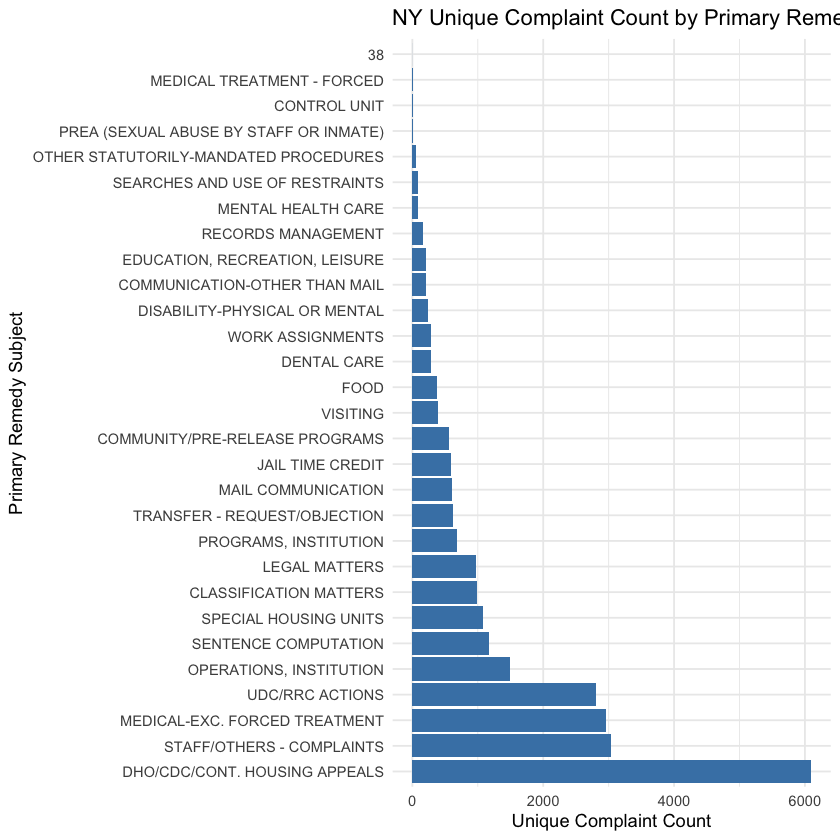

In [37]:
library(ggplot2)

ggplot(analysis, aes(x = reorder(`Primary.Remedy.Subject`, -`Unique Complaint Count`), 
                     y = `Unique Complaint Count`)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  coord_flip() +
  labs(
    title = "NY Unique Complaint Count by Primary Remedy Subject",
    x = "Primary Remedy Subject",
    y = "Unique Complaint Count"
  ) +
  theme_minimal()

# Save with wider dimensions
ggsave(
  "../results/analysis/ny_complaint_breakdown_1.png",
  width = 16, 
  height = 6,
  units = "in"
)
  

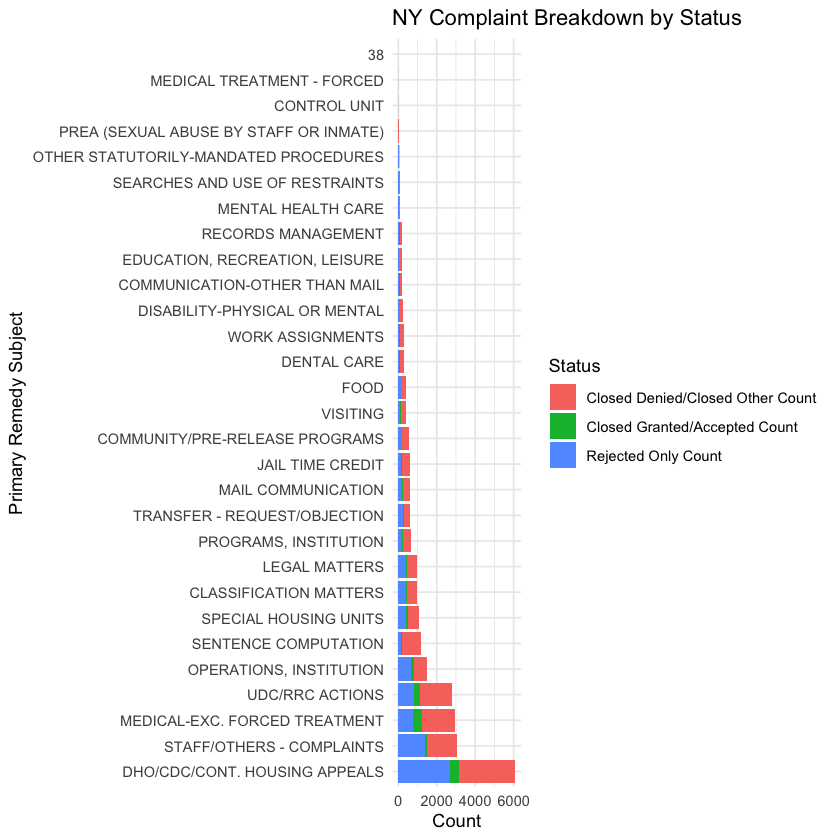

In [40]:
# Reshape the data
analysis_long <- analysis %>%
  pivot_longer(
    cols = c(`Closed Granted/Accepted Count`, `Closed Denied/Closed Other Count`, `Rejected Only Count`),
    names_to = "Status",
    values_to = "Count"
  )

# Create the plot
complaint_plot <- ggplot(analysis_long, aes(x = reorder(`Primary.Remedy.Subject`, -`Unique Complaint Count`), 
                                            y = Count, fill = Status)) +
  geom_bar(stat = "identity") +
  coord_flip() +
  labs(
    title = "NY Complaint Breakdown by Status",
    x = "Primary Remedy Subject",
    y = "Count",
    fill = "Status"
  ) +
  theme_minimal()

# Display the plot
print(complaint_plot)

# Save with wider dimensions
ggsave(
  "../results/analysis/ny_complaint_breakdown_2.png",
  width = 16, 
  height = 6,
  units = "in"
)

